In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import scipy.stats as ss
import pandas as pd
import numpy as np
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from nilearn import plotting
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_conte69
from brainspace.utils.parcellation import map_to_labels
from matplotlib.colors import ListedColormap
import hcp_utils as hcp
import matplotlib.pyplot as plt

surf_lh, surf_rh = load_conte69()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


### read-in Glasser atlas & define color map

In [2]:
glasser = '../data/glasser.csv'
glasser = genfromtxt(glasser)
glasser[:32492].min(),glasser[:32492].max(),glasser[:32492].shape

(0.0, 180.0, (32492,))

In [3]:
glasser_r = glasser[32492:] - 180
glasser_l = glasser[:32492]
glasser = np.concatenate((glasser_l,glasser_r))
glasser[np.where(glasser==0)]=np.nan

In [4]:
cmap = []
for value in hcp.mmp['rgba'].values():
    cmap.append(value)
color_h = ListedColormap(cmap[1:181])

In [5]:
ca = np.array(pd.read_csv('../data/ca_glasser_network.csv',header=None))[:,0].astype(float)
cmap = ListedColormap(np.vstack((list(hcp.ca_network['rgba'].values())))[1:])

In [6]:
labeling_file = '../data/glasser.csv'
labeling = genfromtxt(labeling_file)
mask = labeling != 0
mymask = np.ones((64984,)).astype('bool')
mymask[np.where(mask == False)[0]] = False
mymask[np.where(mask == False)[0] + 32492] = False

In [7]:
ca_v = map_to_labels(ca, labeling, mask=mask)
ca_v[np.where(ca_v==0)] = np.nan


## individual gradients of each FC pattern

### visualizing individual gradients for n=1014 HCP subjects
* LL, RR, LR, RL

In [8]:
color = np.concatenate((ca[:180],np.zeros(180)))

In [9]:
# get list of the HCP subjects
path = ('../data/data_results/gradient/LL/')
path_list = os.listdir(path)
path_list.sort()

In [10]:
ll = [None]*1014
rr = [None]*1014
lr = [None]*1014
rl = [None]*1014
for i in range(1014):
    ll[i] = np.array(pd.read_csv('../data/data_results/gradient/LL/'+path_list[i],header=None))
    rr[i] = np.array(pd.read_csv('../data/data_results/gradient/RR/'+path_list[i],header=None))
    lr[i] = np.array(pd.read_csv('../data/data_results/gradient/LR/'+path_list[i],header=None))
    rl[i] = np.array(pd.read_csv('../data/data_results/gradient/RL/'+path_list[i],header=None))

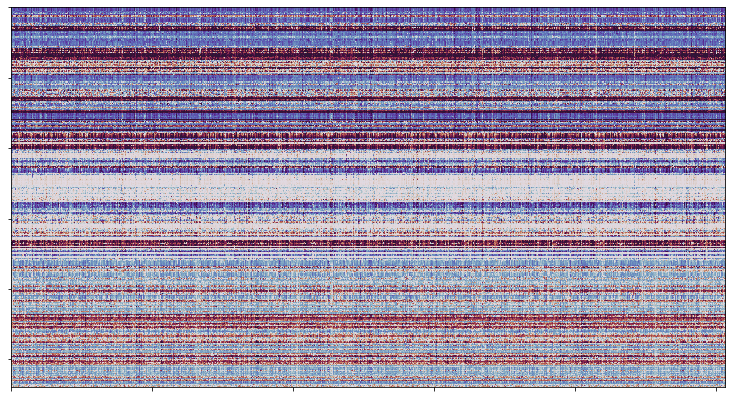

In [11]:
# choose G1, G2, G3
grad13 = np.concatenate((np.array(ll).T[0],np.array(ll).T[1],np.array(ll).T[2]))
plotting.plot_matrix(grad13,figure=(10,10), vmax=0.15,vmin=-0.15, cmap='twilight_shifted',
                     reorder = False, colorbar = False)
plt.savefig('../figures/fig_s1_ll_indi.svg')

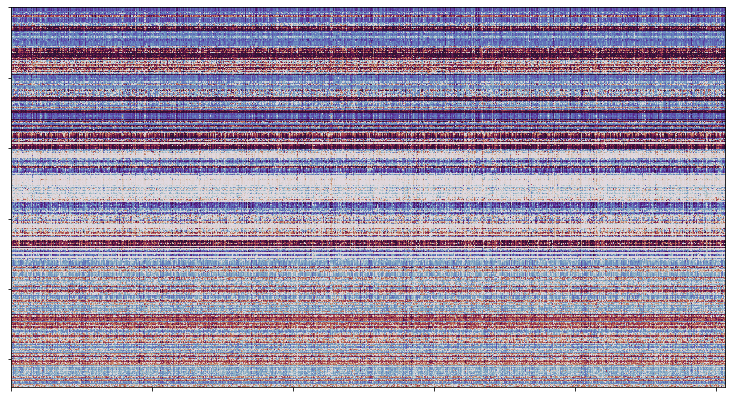

In [12]:
grad13 = np.concatenate((np.array(rr).T[0],np.array(rr).T[1],np.array(rr).T[2]))
plotting.plot_matrix(grad13,figure=(10,10), vmax=0.15,vmin=-0.15, cmap='twilight_shifted',
                     reorder = False, colorbar = False)
plt.savefig('../figures/fig_s1_rr_indi.svg')

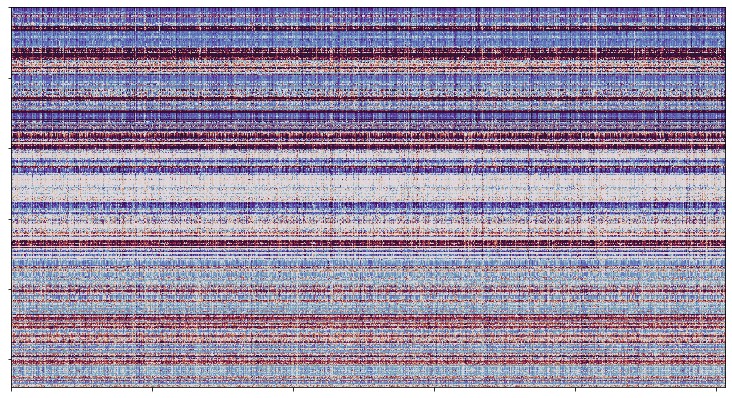

In [13]:
grad13 = np.concatenate((np.array(lr).T[0],np.array(lr).T[1],np.array(lr).T[2]))
plotting.plot_matrix(grad13,figure=(10,10), vmax=0.15,vmin=-0.15, cmap='twilight_shifted',
                     reorder = False, colorbar = False)
plt.savefig('../figures/fig_s1_lr_indi.svg')

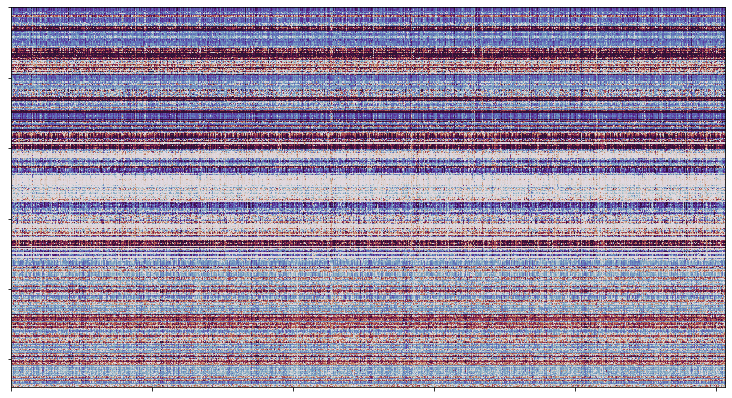

In [14]:
grad13 = np.concatenate((np.array(rl).T[0],np.array(rl).T[1],np.array(rl).T[2]))
plotting.plot_matrix(grad13,figure=(10,10), vmax=0.15,vmin=-0.15, cmap='twilight_shifted',
                     reorder = False, colorbar = False)
plt.savefig('../figures/fig_s1_rl_indi.svg')

### get the mean gradient scores across subjects,
### for LL, RR, LR, RL and for G1, G2, G3

In [15]:
import statistics
ll_mean_g1 = [None]*180
ll_mean_g2 = [None]*180
ll_mean_g3 = [None]*180
rr_mean_g1 = [None]*180
rr_mean_g2 = [None]*180
rr_mean_g3 = [None]*180
lr_mean_g1 = [None]*180
lr_mean_g2 = [None]*180
lr_mean_g3 = [None]*180
rl_mean_g1 = [None]*180
rl_mean_g2 = [None]*180
rl_mean_g3 = [None]*180
for i in range(180):
    ll_mean_g1[i] = statistics.mean(np.array(ll)[:,i][:,0])
    ll_mean_g2[i] = statistics.mean(np.array(ll)[:,i][:,1])
    ll_mean_g3[i] = statistics.mean(np.array(ll)[:,i][:,2])
    rr_mean_g1[i] = statistics.mean(np.array(rr)[:,i][:,0])
    rr_mean_g2[i] = statistics.mean(np.array(rr)[:,i][:,1])
    rr_mean_g3[i] = statistics.mean(np.array(rr)[:,i][:,2])
    lr_mean_g1[i] = statistics.mean(np.array(lr)[:,i][:,0])
    lr_mean_g2[i] = statistics.mean(np.array(lr)[:,i][:,1])
    lr_mean_g3[i] = statistics.mean(np.array(lr)[:,i][:,2])
    rl_mean_g1[i] = statistics.mean(np.array(rl)[:,i][:,0])
    rl_mean_g2[i] = statistics.mean(np.array(rl)[:,i][:,1])
    rl_mean_g3[i] = statistics.mean(np.array(rl)[:,i][:,2])

In [16]:
zero = [0] * 180
nan = np.array(zero)
ll_mean_g1 = np.concatenate((ll_mean_g1,zero))
rr_mean_g1 = np.concatenate((rr_mean_g1,zero))
lr_mean_g1 = np.concatenate((lr_mean_g1,zero))
rl_mean_g1 = np.concatenate((rl_mean_g1,zero))
ll_mean_g2 = np.concatenate((ll_mean_g2,zero))
rr_mean_g2 = np.concatenate((rr_mean_g2,zero))
lr_mean_g2 = np.concatenate((lr_mean_g2,zero))
rl_mean_g2 = np.concatenate((rl_mean_g2,zero))
ll_mean_g3 = np.concatenate((ll_mean_g3,zero))
rr_mean_g3 = np.concatenate((rr_mean_g3,zero))
lr_mean_g3 = np.concatenate((lr_mean_g3,zero))
rl_mean_g3 = np.concatenate((rl_mean_g3,zero))

In [17]:
ll_mean_g1_v = map_to_labels(ll_mean_g1, labeling, mask=mymask)
ll_mean_g2_v = map_to_labels(ll_mean_g2, labeling, mask=mymask)
ll_mean_g3_v = map_to_labels(ll_mean_g3, labeling, mask=mymask)
rr_mean_g1_v = map_to_labels(rr_mean_g1, labeling, mask=mymask)
rr_mean_g2_v = map_to_labels(rr_mean_g2, labeling, mask=mymask)
rr_mean_g3_v = map_to_labels(rr_mean_g3, labeling, mask=mymask)
lr_mean_g1_v = map_to_labels(lr_mean_g1, labeling, mask=mymask)
lr_mean_g2_v = map_to_labels(lr_mean_g2, labeling, mask=mymask)
lr_mean_g3_v = map_to_labels(lr_mean_g3, labeling, mask=mymask)
rl_mean_g1_v = map_to_labels(rl_mean_g1, labeling, mask=mymask)
rl_mean_g2_v = map_to_labels(rl_mean_g2, labeling, mask=mymask)
rl_mean_g3_v = map_to_labels(rl_mean_g3, labeling, mask=mymask)
ll_mean_g1_v[np.where(ll_mean_g1_v==0)] = np.nan
rr_mean_g1_v[np.where(rr_mean_g1_v==0)] = np.nan
lr_mean_g1_v[np.where(lr_mean_g1_v==0)] = np.nan
rl_mean_g1_v[np.where(rl_mean_g1_v==0)] = np.nan
ll_mean_g2_v[np.where(ll_mean_g2_v==0)] = np.nan
rr_mean_g2_v[np.where(rr_mean_g2_v==0)] = np.nan
lr_mean_g2_v[np.where(lr_mean_g2_v==0)] = np.nan
rl_mean_g2_v[np.where(rl_mean_g2_v==0)] = np.nan
ll_mean_g3_v[np.where(ll_mean_g3_v==0)] = np.nan
rr_mean_g3_v[np.where(rr_mean_g3_v==0)] = np.nan
lr_mean_g3_v[np.where(lr_mean_g3_v==0)] = np.nan
rl_mean_g3_v[np.where(rl_mean_g3_v==0)] = np.nan

### color coding mean G1,G2,G3 scores with Cole-Anticevic atlas

In [18]:
ca = np.array(pd.read_csv('../data/ca_glasser_network.csv',header=None))[:,0].astype(float)
color = np.concatenate((ca[:180],zero))
cmap = ListedColormap(np.vstack((list(hcp.ca_network['rgba'].values()))))

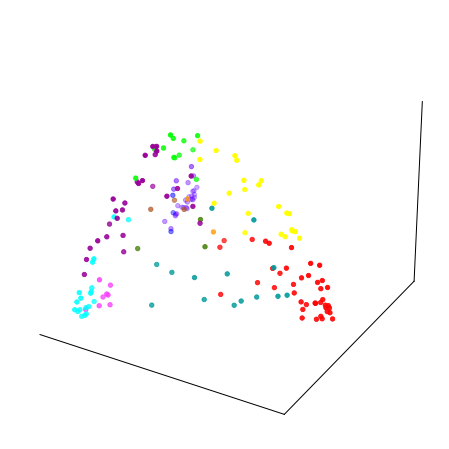

In [19]:
sns.set_context("paper", font_scale = 2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((1, 1, 1, 0))
ax.w_yaxis.set_pane_color((1, 1, 1, 0))
ax.w_zaxis.set_pane_color((1, 1, 1, 0))
ax.set_xticks(np.arange(-0.12, 0.12, 0.04))
ax.set_yticks(np.arange(-0.12, 0.12, 0.04))
ax.set_zticks(np.arange(-0.12, 0.12, 0.04))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.scatter(ll_mean_g1, ll_mean_g2, ll_mean_g3, s = 20, c = color, cmap=cmap, marker = 'o')
fig.savefig('../figures/fig_s1_ll_mean_3d.svg')

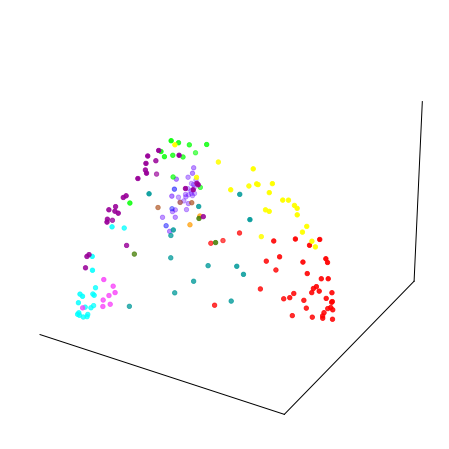

In [20]:
sns.set_context("paper", font_scale = 2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((1, 1, 1, 0))
ax.w_yaxis.set_pane_color((1, 1, 1, 0))
ax.w_zaxis.set_pane_color((1, 1, 1, 0))
ax.set_xticks(np.arange(-0.12, 0.12, 0.04))
ax.set_yticks(np.arange(-0.12, 0.12, 0.04))
ax.set_zticks(np.arange(-0.12, 0.12, 0.04))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.scatter(rr_mean_g1, rr_mean_g2, rr_mean_g3, s = 20, c = color, cmap=cmap, marker = 'o')
fig.savefig('../figures/fig_s1_rr_mean_3d.svg')

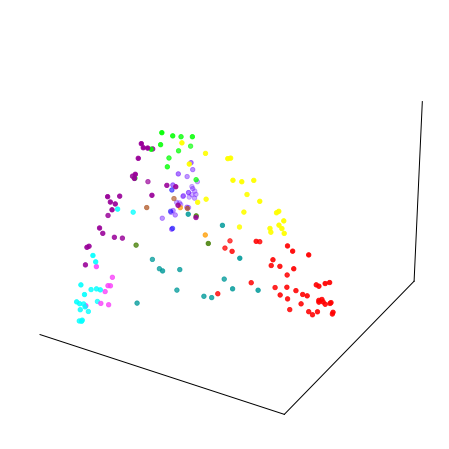

In [21]:
sns.set_context("paper", font_scale = 2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((1, 1, 1, 0))
ax.w_yaxis.set_pane_color((1, 1, 1, 0))
ax.w_zaxis.set_pane_color((1, 1, 1, 0))
ax.set_xticks(np.arange(-0.12, 0.12, 0.04))
ax.set_yticks(np.arange(-0.12, 0.12, 0.04))
ax.set_zticks(np.arange(-0.12, 0.12, 0.04))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.scatter(lr_mean_g1, lr_mean_g2, lr_mean_g3, s = 20, c = color, cmap=cmap, marker = 'o')
fig.savefig('../figures/fig_s1_lr_mean_3d.svg')

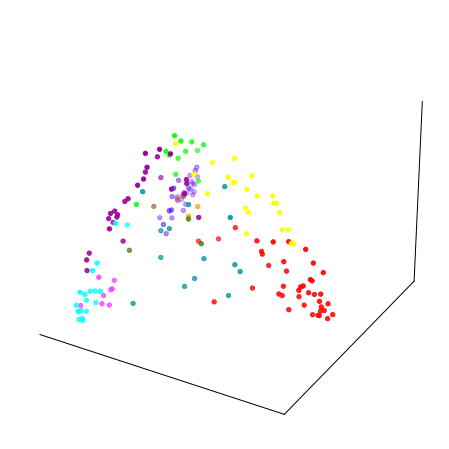

In [22]:
sns.set_context("paper", font_scale = 2)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')
ax.w_xaxis.set_pane_color((1, 1, 1, 0))
ax.w_yaxis.set_pane_color((1, 1, 1, 0))
ax.w_zaxis.set_pane_color((1, 1, 1, 0))
ax.set_xticks(np.arange(-0.12, 0.12, 0.04))
ax.set_yticks(np.arange(-0.12, 0.12, 0.04))
ax.set_zticks(np.arange(-0.12, 0.12, 0.04))
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
ax.scatter(rl_mean_g1, rl_mean_g2, rl_mean_g3, s = 20, c = color, cmap=cmap, marker = 'o')
fig.savefig('../figures/fig_s1_rl_mean_3d.svg')

## Asymmetry and heritability along G2 and G3

In [23]:
intra_AI_g2_mean = np.array(pd.read_csv('../data/data_results/gradient/mean_asym_LLRR.csv',header=None))[:,1]
intra_AI_g2_fdr = np.array(pd.read_csv('../data/data_results/gradient/g_stats_fdr.csv')['intra_g2_fdr'])
intra_AI_g3_mean = np.array(pd.read_csv('../data/data_results/gradient/mean_asym_LLRR.csv',header=None))[:,2]
intra_AI_g3_fdr = np.array(pd.read_csv('../data/data_results/gradient/g_stats_fdr.csv')['intra_g3_fdr'])
inter_AI_g2_mean = np.array(pd.read_csv('../data/data_results/gradient/mean_asym_LRRL.csv',header=None))[:,1]
inter_AI_g2_fdr = np.array(pd.read_csv('../data/data_results/gradient/g_stats_fdr.csv')['inter_g2_fdr'])
inter_AI_g3_mean = np.array(pd.read_csv('../data/data_results/gradient/mean_asym_LRRL.csv',header=None))[:,2]
inter_AI_g3_fdr = np.array(pd.read_csv('../data/data_results/gradient/g_stats_fdr.csv')['inter_g3_fdr'])
intra_AI_g2_h2 = np.array(pd.read_csv('../data/data_results/solar/LL-RR/G2/G2_results_herit.csv')['H2r'])
intra_AI_g2_h2p = np.array(pd.read_csv('../data/data_results/solar/LL-RR/G2/G2_results_herit.csv')['rp'])
intra_AI_g3_h2 = np.array(pd.read_csv('../data/data_results/solar/LL-RR/G3/G3_results_herit.csv')['H2r'])
intra_AI_g3_h2p = np.array(pd.read_csv('../data/data_results/solar/LL-RR/G3/G3_results_herit.csv')['rp'])
inter_AI_g2_h2 = np.array(pd.read_csv('../data/data_results/solar/LR-RL/G2/G2_results_herit.csv')['H2r'])
inter_AI_g2_h2p = np.array(pd.read_csv('../data/data_results/solar/LR-RL/G2/G2_results_herit.csv')['rp'])
inter_AI_g3_h2 = np.array(pd.read_csv('../data/data_results/solar/LR-RL/G3/G3_results_herit.csv')['H2r'])
inter_AI_g3_h2p = np.array(pd.read_csv('../data/data_results/solar/LR-RL/G3/G3_results_herit.csv')['rp'])

In [24]:
def fdr(p_vals):
    from scipy.stats import rankdata
    ranked_p_values = rankdata(p_vals)
    fdr = p_vals * len(p_vals) / ranked_p_values
    fdr[fdr > 1] = 1
    return fdr

In [25]:
intra_AI_g2_h2fdr = fdr(intra_AI_g2_h2p)
intra_AI_g3_h2fdr = fdr(intra_AI_g3_h2p)
inter_AI_g2_h2fdr = fdr(inter_AI_g2_h2p)
inter_AI_g3_h2fdr = fdr(inter_AI_g3_h2p)

In [26]:
intra_AI_g2_mean = map_to_labels(np.concatenate((intra_AI_g2_mean,intra_AI_g2_mean)), labeling, mask=mymask)
intra_AI_g2_mean[np.where(intra_AI_g2_mean==0)] = np.nan
intra_AI_g2_fdr = map_to_labels(np.concatenate((intra_AI_g2_fdr,intra_AI_g2_fdr)), labeling, mask=mymask)
intra_AI_g2_fdr[np.where(intra_AI_g2_fdr==0)] = np.nan

intra_AI_g3_mean = map_to_labels(np.concatenate((intra_AI_g3_mean,intra_AI_g3_mean)), labeling, mask=mymask)
intra_AI_g3_mean[np.where(intra_AI_g3_mean==0)] = np.nan
intra_AI_g3_fdr = map_to_labels(np.concatenate((intra_AI_g3_fdr, intra_AI_g3_fdr)), labeling, mask=mymask)
intra_AI_g3_fdr[np.where(intra_AI_g3_fdr==0)] = np.nan

inter_AI_g2_mean = map_to_labels(np.concatenate((inter_AI_g2_mean,inter_AI_g2_mean)), labeling, mask=mymask)
inter_AI_g2_mean[np.where(inter_AI_g2_mean==0)] = np.nan
inter_AI_g2_fdr = map_to_labels(np.concatenate((inter_AI_g2_fdr, inter_AI_g2_fdr)), labeling, mask=mymask)
inter_AI_g2_fdr[np.where(inter_AI_g2_fdr==0)] = np.nan

inter_AI_g3_mean = map_to_labels(np.concatenate((inter_AI_g3_mean,inter_AI_g3_mean)), labeling, mask=mymask)
inter_AI_g3_mean[np.where(inter_AI_g3_mean==0)] = np.nan
inter_AI_g3_fdr = map_to_labels(np.concatenate((inter_AI_g3_fdr, inter_AI_g3_fdr)), labeling, mask=mymask)
inter_AI_g3_fdr[np.where(inter_AI_g3_fdr==0)] = np.nan

intra_AI_g2_h2[np.where(intra_AI_g2_h2==0)] = 1
intra_AI_g2_h2 = map_to_labels(np.concatenate((intra_AI_g2_h2,intra_AI_g2_h2)), labeling, mask=mymask)
intra_AI_g2_h2[np.where(intra_AI_g2_h2==0)] = np.nan
intra_AI_g2_h2[np.where(intra_AI_g2_h2==1)] = 0
intra_AI_g2_h2fdr = map_to_labels(np.concatenate((intra_AI_g2_h2fdr,intra_AI_g2_h2fdr)), labeling, mask=mymask)
intra_AI_g2_h2fdr[np.where(intra_AI_g2_h2fdr==0)] = np.nan

intra_AI_g3_h2[np.where(intra_AI_g3_h2==0)] = 1 # h2 max is 0.4
intra_AI_g3_h2 = map_to_labels(np.concatenate((intra_AI_g3_h2,intra_AI_g3_h2)), labeling, mask=mymask)
intra_AI_g3_h2[np.where(intra_AI_g3_h2==0)] = np.nan
intra_AI_g3_h2[np.where(intra_AI_g3_h2==1)] = 0
intra_AI_g3_h2fdr = map_to_labels(np.concatenate((intra_AI_g3_h2fdr,intra_AI_g3_h2fdr)), labeling, mask=mymask)
intra_AI_g3_h2fdr[np.where(intra_AI_g3_h2fdr==0)] = np.nan

inter_AI_g2_h2[np.where(inter_AI_g2_h2==0)] = 1
inter_AI_g2_h2 = map_to_labels(np.concatenate((inter_AI_g2_h2,inter_AI_g2_h2)), labeling, mask=mymask)
inter_AI_g2_h2[np.where(inter_AI_g2_h2==0)] = np.nan
inter_AI_g2_h2[np.where(inter_AI_g2_h2==1)] = 0
inter_AI_g2_h2fdr = map_to_labels(np.concatenate((inter_AI_g2_h2fdr,inter_AI_g2_h2fdr)), labeling, mask=mymask)
inter_AI_g2_h2fdr[np.where(inter_AI_g2_h2fdr==0)] = np.nan

inter_AI_g3_h2[np.where(inter_AI_g3_h2==0)] = 1
inter_AI_g3_h2 = map_to_labels(np.concatenate((inter_AI_g3_h2,inter_AI_g3_h2)), labeling, mask=mymask)
inter_AI_g3_h2[np.where(inter_AI_g3_h2==0)] = np.nan
inter_AI_g3_h2[np.where(inter_AI_g3_h2==1)] = 0
inter_AI_g3_h2fdr = map_to_labels(np.concatenate((inter_AI_g3_h2fdr,inter_AI_g3_h2fdr)), labeling, mask=mymask)
inter_AI_g3_h2fdr[np.where(inter_AI_g3_h2fdr==0)] = np.nan

### AI scores for G2, intra-hemisphere fashion

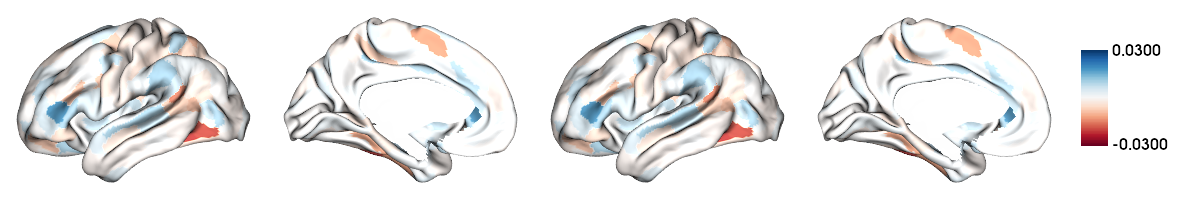

In [27]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g2_mean.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True)

### AI scores for G2, inter-hemisphere fashion

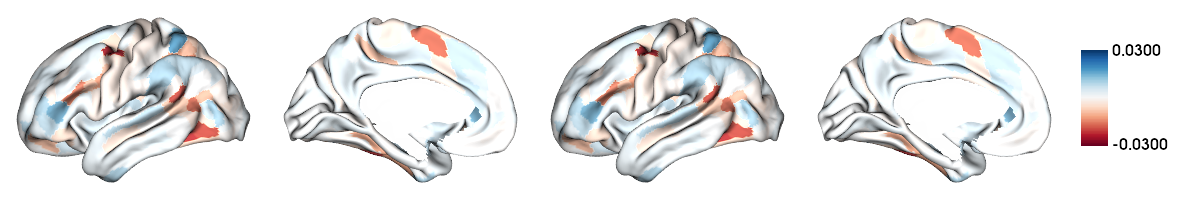

In [28]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g2_mean.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True)

### AI scores for G3, intra-hemisphere fashion

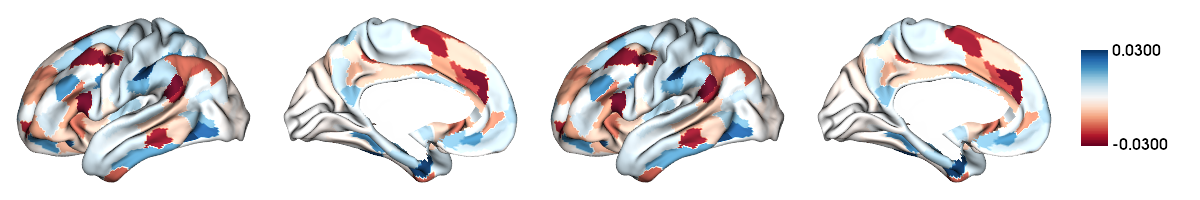

In [29]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g3_mean.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True)

### AI scores for G3, inter-hemisphere fashion

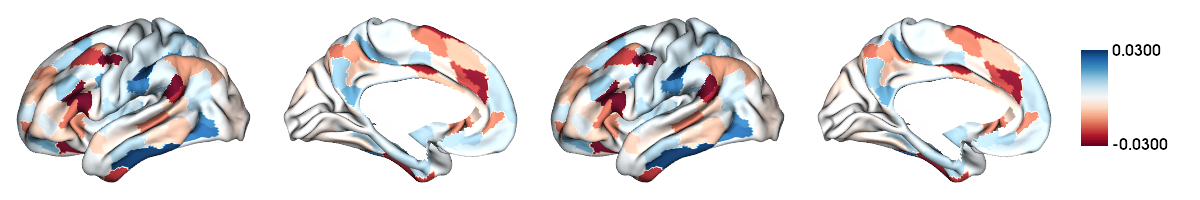

In [30]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g3_mean.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_mean,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'RdBu', color_bar = True, color_range = (-0.03, 0.03),
                 interactive = False, zoom = 1.5, embed_nb = True)

### p(FDR) for the AI scores for G2, intra-hemisphere fashion

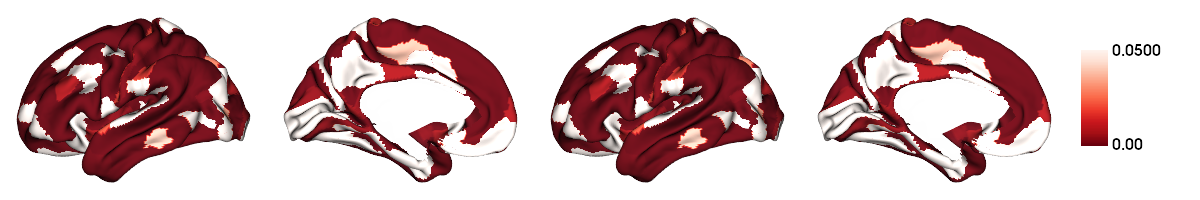

In [31]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g2_fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

### p(FDR) for the AI scores for G2, inter-hemisphere fashion

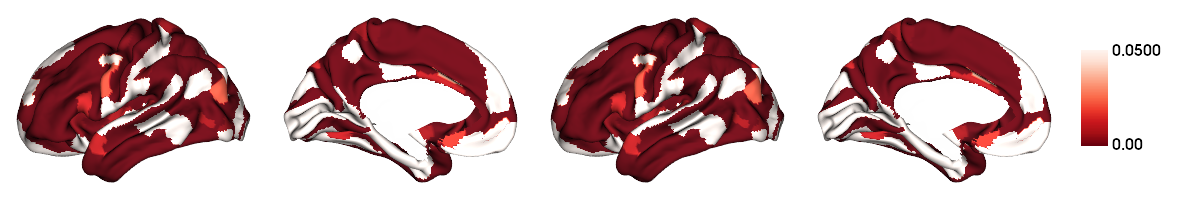

In [32]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g2_fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

### p(FDR) for the AI scores for G3, intra-hemisphere fashion

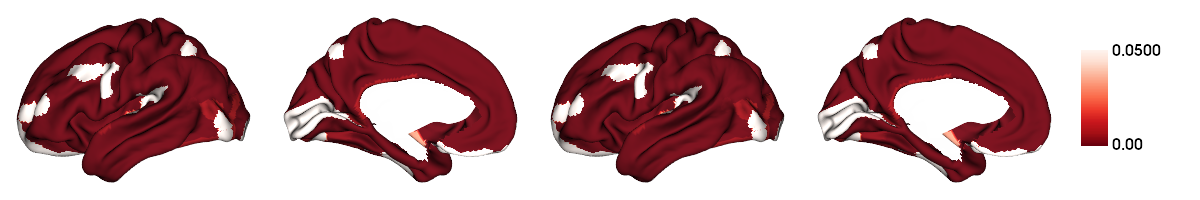

In [33]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g3_fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

### p(FDR) for the AI scores for G3, inter-hemisphere fashion

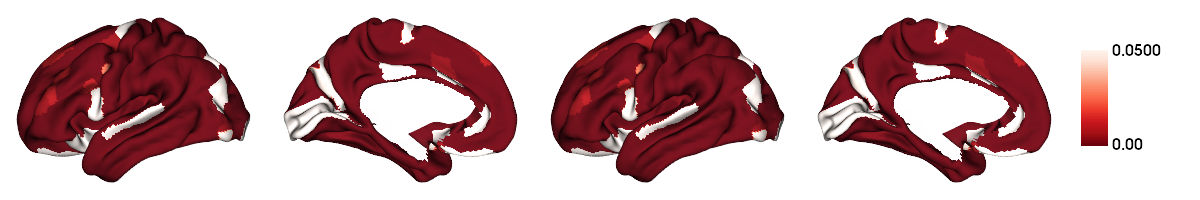

In [34]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g3_fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Reds_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

### Heritability of AI scores for G2, intra-hemisphere fashion

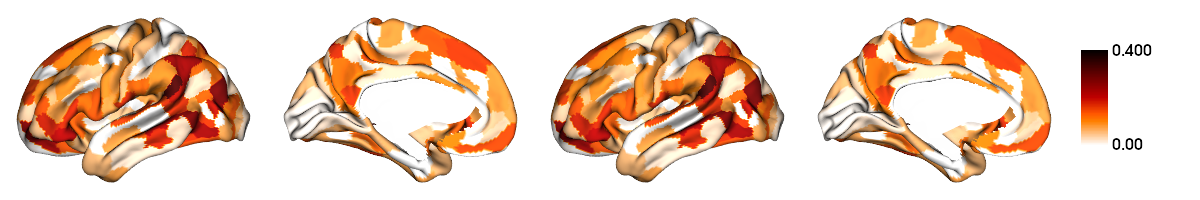

In [35]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_h2,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g2_h2.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_h2,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True)

### Heritability of AI scores for G2, inter-hemisphere fashion

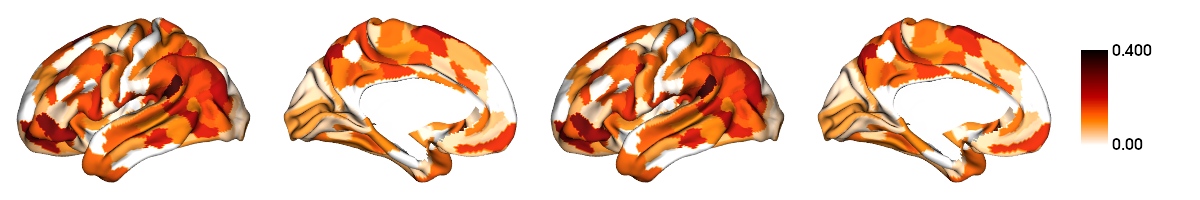

In [36]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_h2,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g2_h2.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_h2,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True)

### Heritability of AI scores for G3, intra-hemisphere fashion

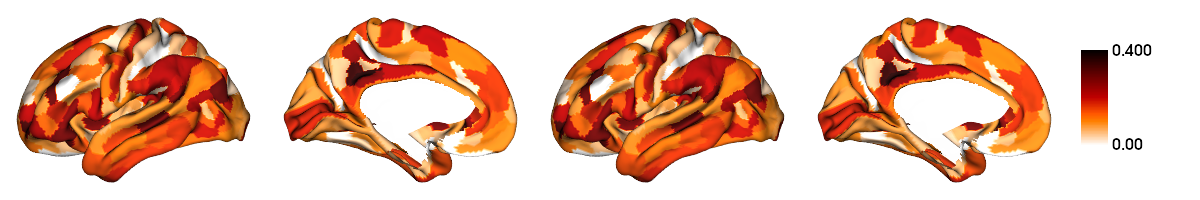

In [37]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_h2,dtype=float),
                 nan_color =  (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g3_h2.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_h2,dtype=float),
                 nan_color =  (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True)

### Heritability of AI scores for G3, inter-hemisphere fashion

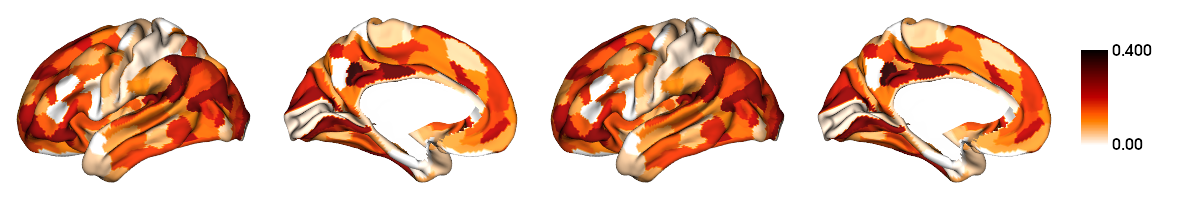

In [38]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_h2,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g3_h2.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_h2,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'gist_heat_r', color_bar = True, color_range = (0, 0.4),
                 interactive = False, zoom = 1.5, embed_nb = True)

### p(FDR) of heritability 

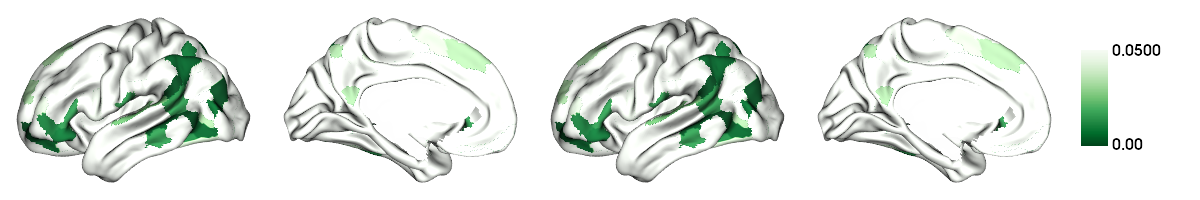

In [39]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g2_h2fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g2_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

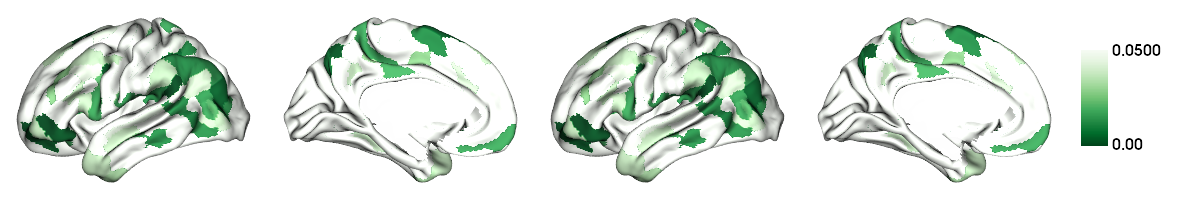

In [40]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g2_h2fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g2_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

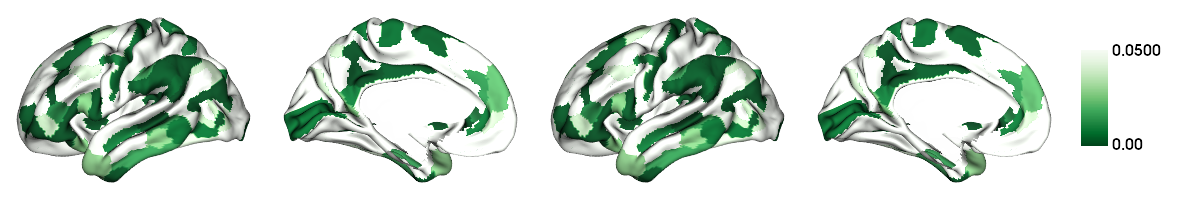

In [41]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_intra_ai_g3_h2fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(intra_AI_g3_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

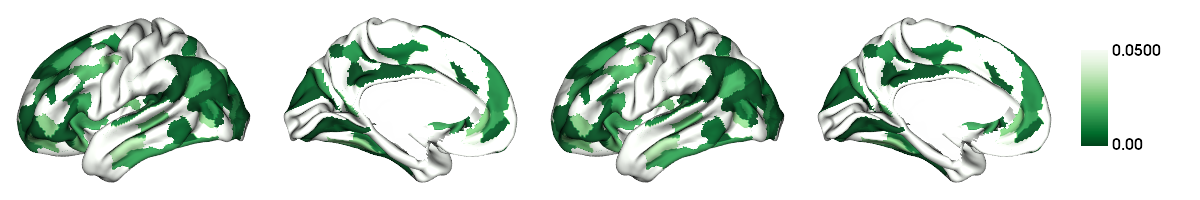

In [42]:
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s3_inter_ai_g3_h2fdr.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(surf_lh, surf_lh, array_name = np.array(inter_AI_g3_h2fdr,dtype=float),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Greens_r', color_bar = True, color_range = (0, 0.05),
                 interactive = False, zoom = 1.5, embed_nb = True)

## Macaque vs human G1 - Cohen's d differences

In [48]:
labeling = markov[:32492]
mask = labeling != 0
intra_cohen_maca_g1 = map_to_labels(macaque['intra_g1_d'], labeling, mask=mask)
inter_cohen_maca_g1 = map_to_labels(macaque['inter_g1_d'], labeling, mask=mask)
intra_cohen_maca_g1[intra_cohen_maca_g1==0]=np.nan
inter_cohen_maca_g1[inter_cohen_maca_g1==0]=np.nan

intra_cohen_m1_h1 = intra_cohen_maca_g1 - hm_intra_g1
inter_cohen_m1_h1 = inter_cohen_maca_g1 - hm_inter_g1

In [49]:
from brainspace import mesh
macaque_lh = mesh.mesh_io.read_surface('../data/macaque_data/surf/spec/MacaqueYerkes19.L.inflated.32k_fs_LR.surf.gii')

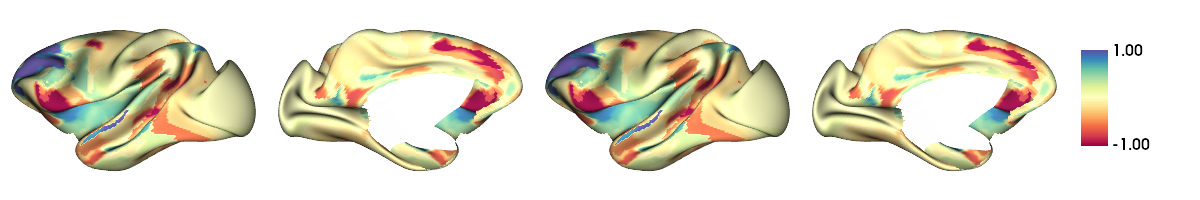

In [50]:
plot_hemispheres(macaque_lh, macaque_lh, array_name = np.concatenate((intra_cohen_m1_h1,intra_cohen_m1_h1)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Spectral', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s5_intra_cohen_g1_h_hm.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(macaque_lh, macaque_lh, array_name = np.concatenate((intra_cohen_m1_h1,intra_cohen_m1_h1)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Spectral', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True)

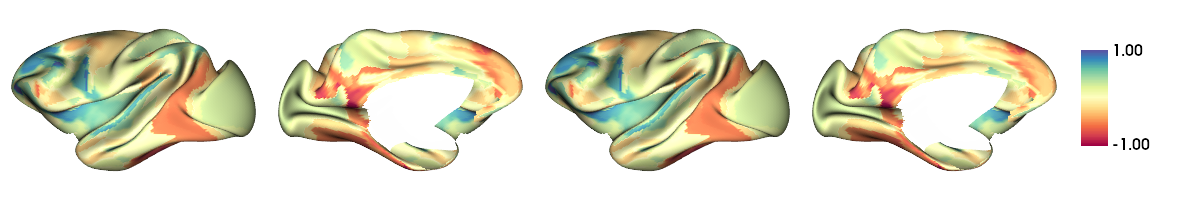

In [51]:
plot_hemispheres(macaque_lh, macaque_lh, array_name = np.concatenate((inter_cohen_m1_h1,inter_cohen_m1_h1)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Spectral', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s5_inter_cohen_g1_h_hm.svg',transparent_bg=True,scale=(2,2))
plot_hemispheres(macaque_lh, macaque_lh, array_name = np.concatenate((inter_cohen_m1_h1,inter_cohen_m1_h1)),
                 nan_color = (1,1,1,0.01),size = (1200, 200),
                 cmap = 'Spectral', color_bar = True, color_range = (-1,1),
                 interactive = False, zoom = 1.5, embed_nb = True)

## functional decoding for inter-hemispheric asymmetry cohen's d

In [52]:
from matplotlib import cm
coolwarm = cm.get_cmap('coolwarm_r', 20)

### read-in t-values for G1 scores for inter-hemispheric LL connectivity

In [53]:
df = pd.read_csv('../data/data_results/gradient/inter_g1_stats.csv')
df['inter_g1_t'] = df['0']

In [54]:
# compute the Cohen d scores

df['inter_g1_d'] = df['inter_g1_t']/pow(1014, 0.5)

In [55]:
cohen_l = np.array(df['inter_g1_d'])
cohen_r = np.array(df['inter_g1_d'])
cohen_l[cohen_l>0]=cohen_l[cohen_l>0]*2
cohen_r[cohen_r<0]=cohen_r[cohen_r<0]*2
cohen_lr = np.concatenate((cohen_l,cohen_r))

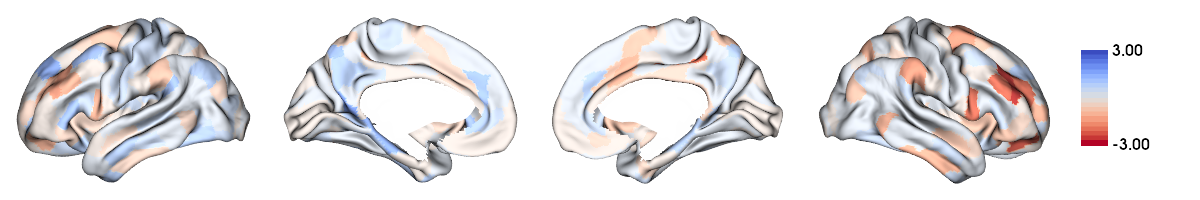

In [56]:
surf_lh, surf_rh = load_conte69()
glasser = '../data/glasser.csv'
glasser = genfromtxt(glasser)
glasser_r = glasser[32492:]
glasser_l = glasser[:32492]
glasser_r[np.where(glasser_r == 180)] = 0
glasser = np.concatenate((glasser_l,glasser_r))

mask = glasser != 0

decode = map_to_labels(cohen_lr, glasser, mask=mask)
decode[np.where(decode==0)] = np.nan
plot_hemispheres(surf_lh, surf_rh, array_name = decode, nan_color = (1,1,1,0.01),size = (1200, 200),color_range=(-3, 3),
                 cmap = coolwarm, color_bar = True, interactive = False, zoom = 1.5, embed_nb = True,
                 screenshot=True, filename='../figures/fig_s6_inter_g1_cohen.svg')

plot_hemispheres(surf_lh, surf_rh, array_name = decode, nan_color = (1,1,1,0.01),size = (1200, 200), color_range=(-3, 3),
                 cmap = coolwarm, color_bar = True, interactive = False, zoom = 1.5, embed_nb = True)

In [57]:
from scipy.io import loadmat
func_mmp = loadmat('../data/metaanalysis/functional_maps.mat')['funcmap']
func_mmp.shape

(24, 64984)

In [58]:
cohen_rank = ss.rankdata(cohen_lr)
for i in range(20):
  cohen_rank[np.logical_and(cohen_rank>i*18, cohen_rank<=(i+1)*18)] = i+1
cohen_64k = map_to_labels(cohen_rank, glasser, mask=mask)

In [59]:
func_bin = np.zeros((24, 20))
for i in range(24):
  for j in range(20):
    func_bin[i][j] = func_mmp[i][cohen_64k==j+1].mean()
cohen_bin = np.array([cohen_lr[cohen_rank==i+1].mean() for i in range(20)])

In [60]:
tmp_z = ss.zscore(func_bin, axis=1)
tmp=tmp_z.copy()
tmp[tmp<0.5] = np.nan
weight = tmp * cohen_bin
term_rank = np.nanmean(weight, axis=1)

In [61]:
df_inter = pd.DataFrame(tmp_z[term_rank.argsort()])

terms=np.array(['action','affective',"attention","auditory","autobiographical memory","cognitive control",
       "emotion","episodic memory","eye movement",'face','inhibition','language',
       'motor','multisensory','pain','reading','reward','semantics',
       'social cognition','verbal','visual','visual perception','visuospatial','working memory'])

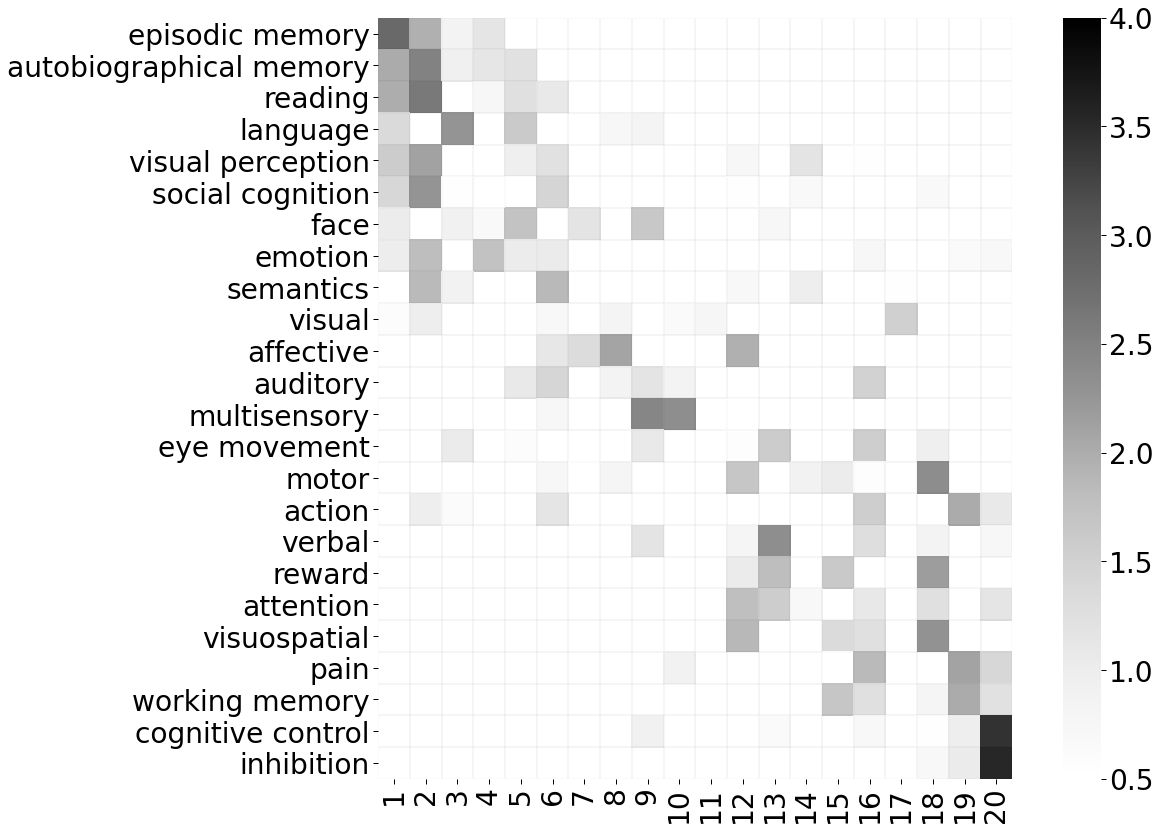

In [62]:
df_inter.index=terms[term_rank.argsort()][::-1]
df_inter.columns = range(1,21)
sns.set_context("paper", font_scale = 3.2)
f, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(18, 14), sharey = True)

sns.heatmap(df_inter, linewidths=1, square=True, linecolor = (0, 0, 0, 0.02),
            cmap='Greys', robust=False, ax = ax1,
            vmin = 0.5, vmax = 4, mask = df_inter < 0.5)
f.savefig('../figures/fig_s6_inter_g1_20bins.svg')

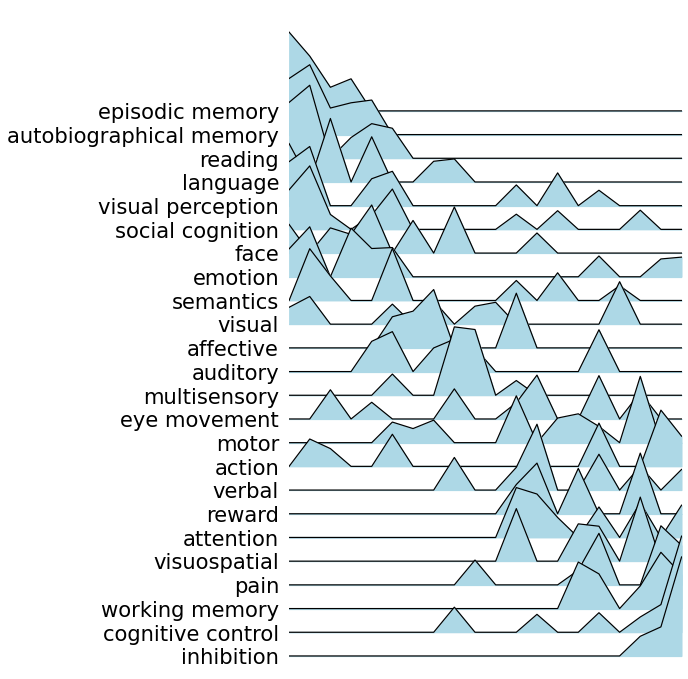

In [63]:
import joypy as jp
df_inter[df_inter<0.5] = 0

sns.set_context("paper", font_scale = 2.2)
fig,axes = jp.joyplot(df_inter.T, figsize = (10,10), x_range = range(20), 
                      color='lightblue', xlabels = False, kind = 'values')

plt.savefig('../figures/fig_s5_inter_g6_wave.svg')